In [1]:
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy

### From Scott Wales' tutorial

https://scottwales.github.io/aus2200-training/ancillaries.html

d0198 [143.11189499999998, 152.021895, -42.336802, -33.426802]
d1000 [130.066895, 165.066895, -50.381802, -25.381802]
era5 [129.066895, 166.066895, -51.381802, -24.381802]


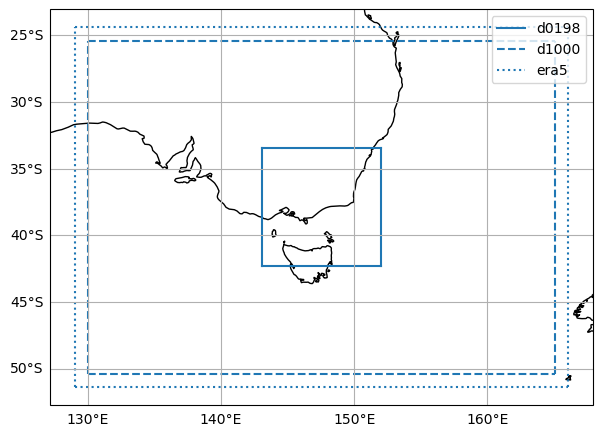

In [5]:
def plot_region(ax, name: str, centre: T.Tuple[float, float], res: T.Tuple[float, float], size: T.Tuple[int, int], pole: T.Tuple[float, float]=(90,180), rim: int=9, halo: T.Tuple[int, int]=(7,7), **kwargs):
    """
    Plots a LAM region, including its rim and halo
    """
    
    draw_box_centre_size(ax, name, centre, res, size, pole, **kwargs)
    
    #rim_size = [size[0]-rim*2, size[1]-rim*2]
    #draw_box_centre_size(ax, name + '_rim', centre, res, rim_size, pole, ls='--', **kwargs)
    
    #halo_size = [size[0]+halo[0]*2, size[1]+halo[1]*2]
    #draw_box_centre_size(ax, name + '_halo', centre, res, halo_size, pole, ls=':', **kwargs)
    
def draw_box_centre_size(ax, name: str, centre: T.Tuple[float, float], res: T.Tuple[float, float], size: T.Tuple[int, int], pole: T.Tuple[float, float]=(90,180), **kwargs):
    """
    Draws a box given its centre and size
    """
    size_lon = res[1] * size[1]
    size_lat = res[0] * size[0]

    draw_box_corners(ax, name, corners=[centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2], pole=pole, **kwargs)
    
def draw_box_corners(ax, name: str, corners: T.Tuple[float, float, float, float], pole: T.Tuple[float, float]=(90,180), **kwargs):
    """
    Draws a box given its corners
    """
    x0,x1,y0,y1 = corners
    
    lons = numpy.linspace(x0,x1)
    lats = numpy.linspace(y0,y1)
        
    crs = ccrs.RotatedGeodetic(pole[1], pole[0])
    ax.plot(lons, [y0]*lons.size, transform=crs, **kwargs, label=name) 
    ax.plot(lons, [y1]*lons.size, transform=crs, **kwargs) 
    ax.plot([x0]*lats.size, lats, transform=crs, **kwargs) 
    ax.plot([x1]*lats.size, lats, transform=crs, **kwargs)
    print(name,corners)

plt.figure(figsize=(7,7))
ax = plt.axes(projection=ccrs.PlateCarree())
plot_region(ax, 'd0198', centre=[-37.881802,147.566895], res=[0.0198,0.0198], size=[450,450], color="tab:blue")
#plot_region(ax, 'd0100', centre=[-37.881802,147.566895], res=[0.0100,0.0100], size=[750,750], color="tab:blue")
plot_region(ax, 'd1000', centre=[-37.881802,147.566895], res=[0.1,0.1], size=[250,350], color="tab:blue",ls="--")
plot_region(ax, 'era5', centre=[-37.881802,147.566895], res=[0.1,0.1], size=[270,370], color="tab:blue",ls=":")
ax.coastlines()
ax.gridlines(draw_labels=["bottom","left"])
plt.legend(loc=1)